# Imports

In [392]:
import pandas as pd
import gender_guesser.detector as gender

# Visualisations
import seaborn as sns
from plotnine import *

# Getting the data

## Movies produced in Spain

In [463]:
df_spanish_movies_bechdel = pd.read_csv("def_wikipedia_spanish_movies_bechdel.csv", dtype='str')

In [464]:
df_spanish_movies_bechdel.drop(columns=['index', 'status', 'version', 'description'], inplace=True)

In [465]:
df_spanish_movies_bechdel

,date,dubious,year,visible,rating,title,submitterid,id,imdbid
0,2010-09-20 14:03:37,0,1984.0,1,3.0,What Have I Done to Deserve This?,1917.0,1582.0,0088461
1,2016-08-29 21:07:49,0,2007.0,1,3.0,Las 13 rosas,13899.0,7079.0,0809533
2,2013-09-30 07:26:05,0,2005.0,1,3.0,20 centimetros,8387.0,4648.0,0421528
3,2011-04-17 13:15:29,0,2010.0,1,3.0,For 80 Days,3070.0,2192.0,1600383
4,2017-05-21 15:24:52,0,2002.0,1,3.0,A mi madre le gustan las mujeres,14890.0,7649.0,0306432
...,...,...,...,...,...,...,...,...,...
118,2018-01-06 23:15:46,0,2017.0,1,3.0,Veronica,15613.0,7985.0,5862312
119,2014-03-15 16:44:43,0,2013.0,1,0.0,Vivir es facil con los ojos cerrados,9671.0,5283.0,2896036
120,2014-08-24 19:48:57,0,2013.0,1,3.0,The German Doctor,10733.0,5714.0,1847746
121,2010-09-08 11:41:30,0,2007.0,1,3.0,XXY,1859.0,1552.0,0995829


Since we've read the CSV file as string type in order not to lose any information related to the IMDb ID (because if it's read as a integer and it has 0s at the beggining, they'll be omitted), we need to modify the type of the columns "year" and "rating" so we'll be able to work with them.

In [466]:
df_spanish_movies_bechdel['year'] = df_spanish_movies_bechdel['year'].astype(float)
df_spanish_movies_bechdel['rating'] = df_spanish_movies_bechdel['rating'].astype(float)

Let's rename the column "rating" to "Bechdel Score" so it's clearer what we're talking about.

In [467]:
df_spanish_movies_bechdel.rename(columns={'rating':'Bechdel Score'}, inplace=True)

Let's convert the variable year into a DateTime object.

In [468]:
df_spanish_movies_bechdel['year'] = pd.to_datetime(df_spanish_movies_bechdel['year'], format='%Y')

Next, I will change the Bechdel Scores to categorical variables.

In [469]:
df_spanish_movies_bechdel['Bechdel Score'] = df_spanish_movies_bechdel['Bechdel Score'].astype('category', copy=False)

Finally, the data is prepared and can be used to do some data visualization.

Let's create a count plot using Seaborn, to visualize the Bechdel scores.

<AxesSubplot:xlabel='Bechdel Score', ylabel='count'>

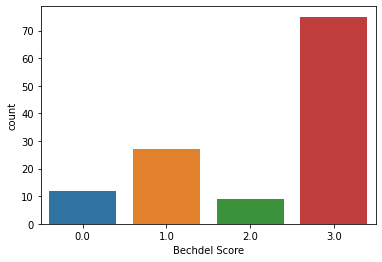

In [470]:
sns.countplot(x='Bechdel Score', data=df_spanish_movies_bechdel)

As can be seen, most Spanish films score highly in the Bechdel test, but how many of them pass the test completely?

In [471]:
li = []
for i in df_spanish_movies_bechdel['Bechdel Score']:
    if(i < 3):
        li.append(0)
    else:
        li.append(1)
df_spanish_movies_bechdel['pass_test'] = li
df_spanish_movies_bechdel

,date,dubious,year,visible,Bechdel Score,title,submitterid,id,imdbid,pass_test
0,2010-09-20 14:03:37,0,1984-01-01,1,3.0,What Have I Done to Deserve This?,1917.0,1582.0,0088461,1
1,2016-08-29 21:07:49,0,2007-01-01,1,3.0,Las 13 rosas,13899.0,7079.0,0809533,1
2,2013-09-30 07:26:05,0,2005-01-01,1,3.0,20 centimetros,8387.0,4648.0,0421528,1
3,2011-04-17 13:15:29,0,2010-01-01,1,3.0,For 80 Days,3070.0,2192.0,1600383,1
4,2017-05-21 15:24:52,0,2002-01-01,1,3.0,A mi madre le gustan las mujeres,14890.0,7649.0,0306432,1
...,...,...,...,...,...,...,...,...,...,...
118,2018-01-06 23:15:46,0,2017-01-01,1,3.0,Veronica,15613.0,7985.0,5862312,1
119,2014-03-15 16:44:43,0,2013-01-01,1,0.0,Vivir es facil con los ojos cerrados,9671.0,5283.0,2896036,0
120,2014-08-24 19:48:57,0,2013-01-01,1,3.0,The German Doctor,10733.0,5714.0,1847746,1
121,2010-09-08 11:41:30,0,2007-01-01,1,3.0,XXY,1859.0,1552.0,0995829,1


Now, there is a column called pass_test, with a value of 1 for all the movies that pass the Bechdel test, and a value of 0 for the movies that don’t.

Let's visualize this using Seaborn.

<AxesSubplot:xlabel='pass_test', ylabel='count'>

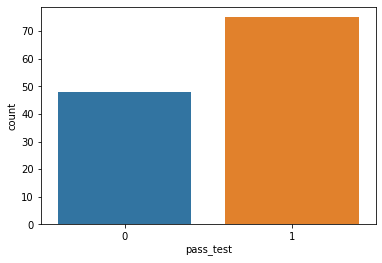

In [472]:
sns.countplot(x='pass_test', data=df_spanish_movies_bechdel)

After this change, it is possible to observe that not so many Spanish films pass the Bechdel test.

However, this difference is not as significant as it could be. There still seems to be a very large number of movies that didn’t pass the test.

## How have Bechdel scores changed with time?

Has there been an improvement in the representation of women in the film industry? Are things still the same? Did they get worse?

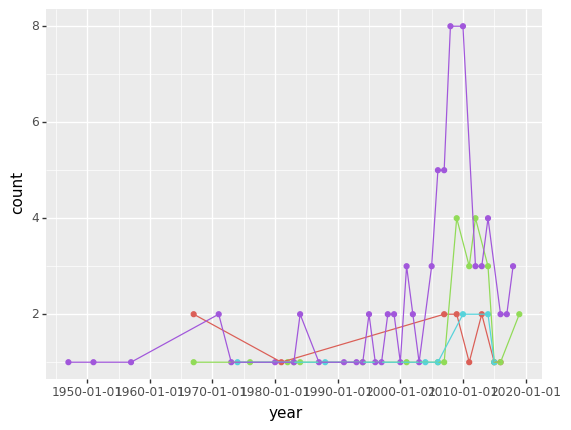

<ggplot: (8772438149247)>

In [473]:
(ggplot(df_spanish_movies_bechdel)+
 geom_point(aes('year',color=df_spanish_movies_bechdel['Bechdel Score']),stat='count',show_legend=False)+
 geom_line(aes('year',color=df_spanish_movies_bechdel['Bechdel Score']),stat='count',show_legend=False))

It could be said that, until the 2000s, few films passed the Bechdel test. During this time, there was no significant difference between movies that passed the test and movies that didn’t.

The years between the 2000s and 2010s saw a spike in the number of movies that passed the Bechdel test, and there is massive improvement going into the 21st century.

## Analysing the relationship between IMDb rating and the Bechdel scores

For this and subsequent analyses we will make use of the other generated CSV file "spanish_movies_data.csv", which contains relevant information on all films (IMDb rating, genre, director, budget and gross).

We'll merge it with the existing data frame.

In [478]:
imdb_df = pd.read_csv('spanish_movies_data.csv', dtype=str)
df_spanish_movies_bechdel_data = pd.merge(df_spanish_movies_bechdel, imdb_df, how='left', left_on=['imdbid'], right_on=['imdbid'])
df_spanish_movies_bechdel_data

,date,dubious,year,visible,Bechdel Score,title,submitterid,id,imdbid,pass_test,rating,genre,director,budget,gross
0,2010-09-20 14:03:37,0,1984-01-01,1,3.0,What Have I Done to Deserve This?,1917.0,1582.0,0088461,1,7.1,Comedy,Pedro Almodóvar,No budget,No gross
1,2016-08-29 21:07:49,0,2007-01-01,1,3.0,Las 13 rosas,13899.0,7079.0,0809533,1,6.6,Drama,Emilio Martínez Lázaro,9000000,6939516
2,2013-09-30 07:26:05,0,2005-01-01,1,3.0,20 centimetros,8387.0,4648.0,0421528,1,6.6,Comedy,Ramón Salazar,No budget,439632
3,2011-04-17 13:15:29,0,2010-01-01,1,3.0,For 80 Days,3070.0,2192.0,1600383,1,6.9,Drama,Jon Garaño,No budget,115251
4,2017-05-21 15:24:52,0,2002-01-01,1,3.0,A mi madre le gustan las mujeres,14890.0,7649.0,0306432,1,6.2,Comedy,Daniela Fejerman,No budget,2447070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2018-01-06 23:15:46,0,2017-01-01,1,3.0,Veronica,15613.0,7985.0,5862312,1,6.2,Horror,Paco Plaza,No budget,6123089
119,2014-03-15 16:44:43,0,2013-01-01,1,0.0,Vivir es facil con los ojos cerrados,9671.0,5283.0,2896036,0,7.0,Comedy,David Trueba,No budget,3075169
120,2014-08-24 19:48:57,0,2013-01-01,1,3.0,The German Doctor,10733.0,5714.0,1847746,1,6.7,Drama,Lucía Puenzo,2000000,3635718
121,2010-09-08 11:41:30,0,2007-01-01,1,3.0,XXY,1859.0,1552.0,0995829,1,7.0,Drama,Lucía Puenzo,No budget,2728869


Let's create a new data frame with only the year, Bechdel score, and IMDB rating, so we can visualize the relationship between the three.

In [479]:
df_spanish_movies_bechdel_data['rating'] = df_spanish_movies_bechdel_data['rating'].astype(float)

# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
df_spanish_movies_year_score_rating = df_spanish_movies_bechdel_data.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
df_spanish_movies_year_score_rating

,year,Bechdel Score,rating
0,1947-01-01,0.0,NaN
1,1947-01-01,1.0,NaN
2,1947-01-01,2.0,NaN
3,1947-01-01,3.0,6.300000
4,1951-01-01,0.0,NaN
...,...,...,...
167,2018-01-01,3.0,6.733333
168,2019-01-01,0.0,NaN
169,2019-01-01,1.0,7.550000
170,2019-01-01,2.0,NaN


/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_point : Removed 109 rows containing missing values.


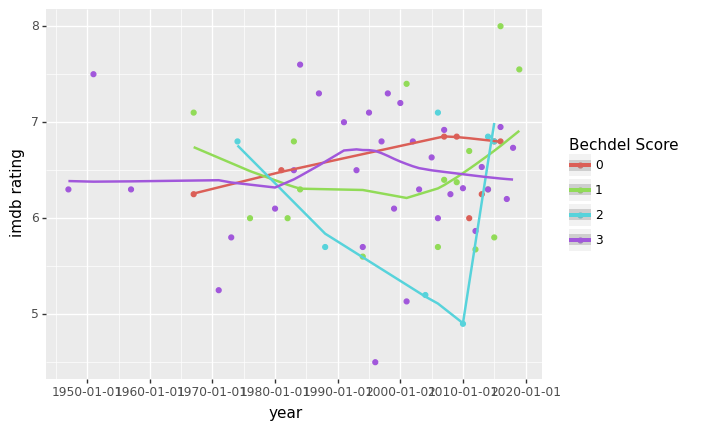

<ggplot: (8772441677219)>

In [480]:
# Plot year against IMDB rating and Bechdel Score:
ratings_plot = ggplot(df_spanish_movies_year_score_rating,aes(x='year',y='rating',color='Bechdel Score'))+geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )
ratings_plot

As can be seen, the IMDb scores of films that pass the Bechdel test peaked between 1990s and 2000s, and started to decline thereafter. In contrast, all films that do not pass the Bechdel test have been increasing their scores over the last few years, paradoxically.

## Analysisng the relationship between the gender of the director and Bechdel scores

I assume that movies with female directors are more likely to have higher Bechdel scores, which I will try to plot here.

Let's try to predict the gender of the director given their first name with the library gender-guesser, and append it to the data frame.

In [482]:
# Predicting gender of director from first name:
d = gender.Detector()
genders = []
first_names = df_spanish_movies_bechdel_data['director'].str.split().str.get(0)
for i in first_names[0:len(first_names)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')
df_spanish_movies_bechdel_data['gender'] = genders
df_spanish_movies_bechdel_data = df_spanish_movies_bechdel_data[df_spanish_movies_bechdel_data['gender'] != 'unknown']
# Encode the variable gender into a new dataframe:
df_spanish_movies_bechdel_data['Male'] = df_spanish_movies_bechdel_data['gender'].map( {'male':1, 'female':0} )

<ipython-input-482-7eb30cff04b6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [483]:
df_spanish_movies_bechdel_data

,date,dubious,year,visible,Bechdel Score,title,submitterid,id,imdbid,pass_test,rating,genre,director,budget,gross,gender,Male
0,2010-09-20 14:03:37,0,1984-01-01,1,3.0,What Have I Done to Deserve This?,1917.0,1582.0,0088461,1,7.1,Comedy,Pedro Almodóvar,No budget,No gross,male,1
1,2016-08-29 21:07:49,0,2007-01-01,1,3.0,Las 13 rosas,13899.0,7079.0,0809533,1,6.6,Drama,Emilio Martínez Lázaro,9000000,6939516,male,1
2,2013-09-30 07:26:05,0,2005-01-01,1,3.0,20 centimetros,8387.0,4648.0,0421528,1,6.6,Comedy,Ramón Salazar,No budget,439632,male,1
3,2011-04-17 13:15:29,0,2010-01-01,1,3.0,For 80 Days,3070.0,2192.0,1600383,1,6.9,Drama,Jon Garaño,No budget,115251,male,1
4,2017-05-21 15:24:52,0,2002-01-01,1,3.0,A mi madre le gustan las mujeres,14890.0,7649.0,0306432,1,6.2,Comedy,Daniela Fejerman,No budget,2447070,female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2018-01-06 23:15:46,0,2017-01-01,1,3.0,Veronica,15613.0,7985.0,5862312,1,6.2,Horror,Paco Plaza,No budget,6123089,male,1
119,2014-03-15 16:44:43,0,2013-01-01,1,0.0,Vivir es facil con los ojos cerrados,9671.0,5283.0,2896036,0,7.0,Comedy,David Trueba,No budget,3075169,male,1
120,2014-08-24 19:48:57,0,2013-01-01,1,3.0,The German Doctor,10733.0,5714.0,1847746,1,6.7,Drama,Lucía Puenzo,2000000,3635718,female,0
121,2010-09-08 11:41:30,0,2007-01-01,1,3.0,XXY,1859.0,1552.0,0995829,1,7.0,Drama,Lucía Puenzo,No budget,2728869,female,0


The data frame has two additional variables; gender and male. Gender represents the gender of the director. The variable male has a value of 1 if the director is male, and 0 if she is female.

Now that I have this information, I will go ahead and visualize some more trends in the data.

Let's create a count plot of the variable gender, to visualize the number of males to females in the dataset.

<AxesSubplot:xlabel='gender', ylabel='count'>

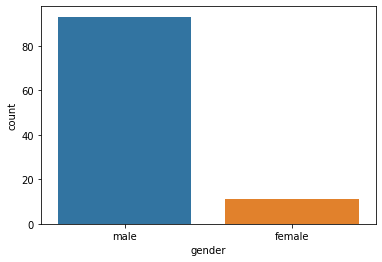

In [484]:
sns.countplot(x='gender',data=df_spanish_movies_bechdel_data)

It appears as though almost all the movies in the dataset have male directors. Again, this was something I expected, since Spanish movies are not known for having a large number of female directors.

Next, I will visualize the gender of the director with the Bechdel score, to see if movies with female directors have a higher score.

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


<AxesSubplot:xlabel='Bechdel Score', ylabel='count'>

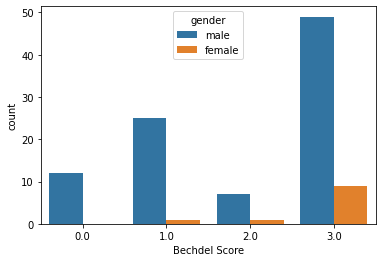

In [485]:
sns.countplot(x='Bechdel Score',hue='gender',data=df_spanish_movies_bechdel_data)

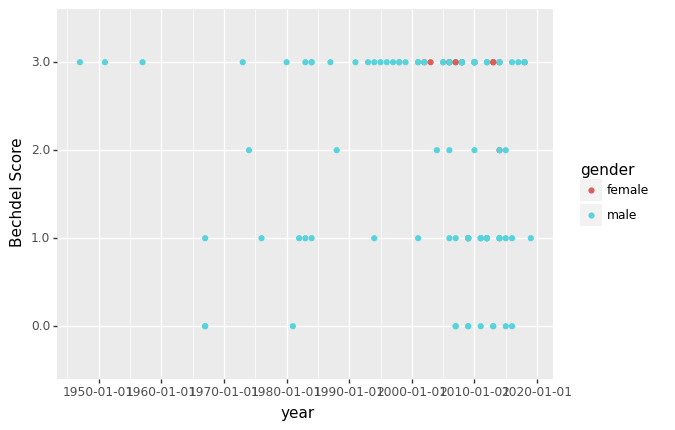

<ggplot: (8772441416608)>

In [486]:
ggplot(df_spanish_movies_bechdel_data, aes(x='year', y='Bechdel Score', color='gender'))+geom_point()

All the movies with female directors seem to pass the Bechdel test!

Now let's take a look at the variable budget, to see if there is any kind of correlation between the budget of a movie and it’s Bechdel score.

## Analysis of the relationship between the budget and the Bechdel score

In [488]:
df_spanish_movies_bechdel_data.at[10, 'budget'] = "8000000"

<ipython-input-489-820b5674c1d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not y

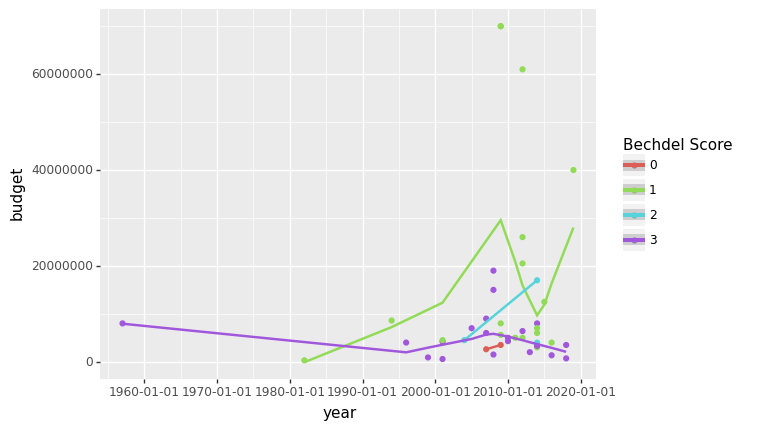

<ggplot: (8772441472016)>

In [489]:
df_movies_with_budget = df_spanish_movies_bechdel_data[df_spanish_movies_bechdel_data['budget'] != 'No budget']
df_movies_with_budget['budget'] = df_movies_with_budget['budget'].astype('float') 
ggplot(df_movies_with_budget, aes(x='year', y='budget',color='Bechdel Score'))+geom_point()+geom_smooth()

One thing that can be seen here is a significant increase in a movie’s budget with time except for the movies that pass the Bechdel test. Movies that pass the Bechdel test seem to have a way less budget than movies that score a one or two, but there is no strong correlation that can be observed here.

Let's visualize the relationship between budget and gender of the director.

## Analysis of the relationship between the budget and the gender of the director

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


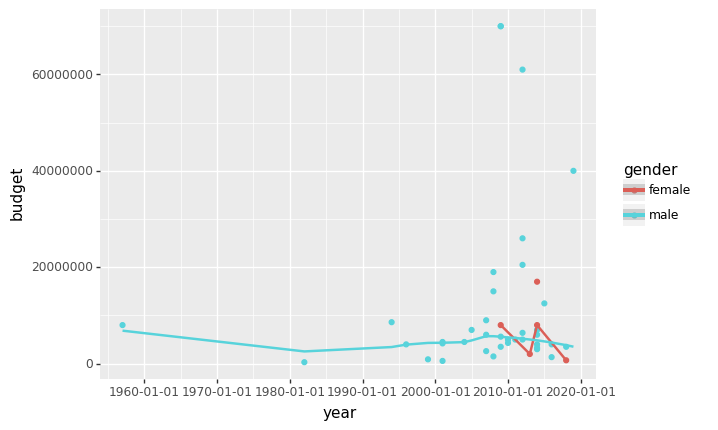

<ggplot: (8772441465769)>

In [490]:
ggplot(df_movies_with_budget, aes(x='year', y='budget',color='gender'))+geom_point()+geom_smooth()

The gender of the director does not appear to have any kind of relationship or impact on the budget of a movie.

## Analysing the relationship between a movie’s budget, Bechdel score, and gender of director

/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


<AxesSubplot:xlabel='Bechdel Score', ylabel='budget'>

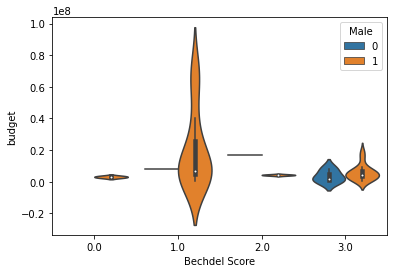

In [491]:
sns.violinplot(x='Bechdel Score',y='budget',hue='Male', data=df_movies_with_budget)

## Analysing the genre of a movie and Bechdel scores, and any changes with time

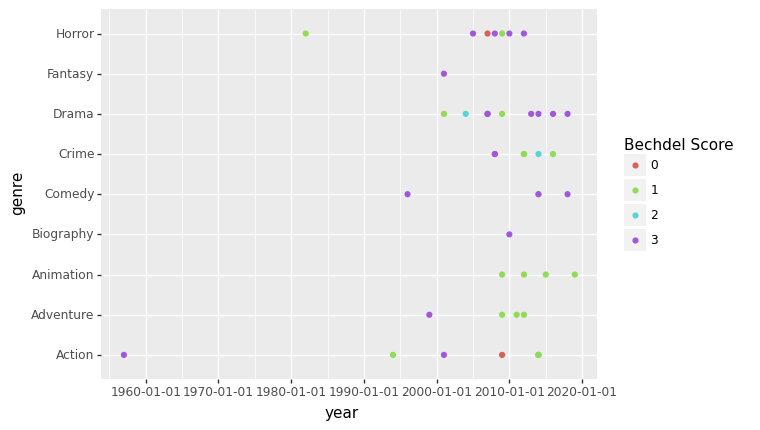

<ggplot: (8772443758656)>

In [492]:
ggplot(df_movies_with_budget, aes(x = 'year', y = 'genre',color='Bechdel Score'))+geom_point()

## Analysing the movie grossings, along with year, Bechdel scores, and gender

In [495]:
df_movies_with_gross = df_spanish_movies_bechdel_data[df_spanish_movies_bechdel_data['gross'] != 'No gross']
df_movies_with_gross['gross'] = df_movies_with_gross['gross'].astype('float')

<ipython-input-495-d72ffe252b18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
/Users/Administrador/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.


<AxesSubplot:xlabel='Bechdel Score', ylabel='gross'>

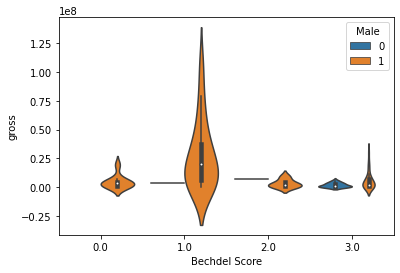

In [496]:
# Movie grossing with Bechdel score and gender:
sns.violinplot(x='Bechdel Score',y='gross',hue='Male',data=df_movies_with_gross)

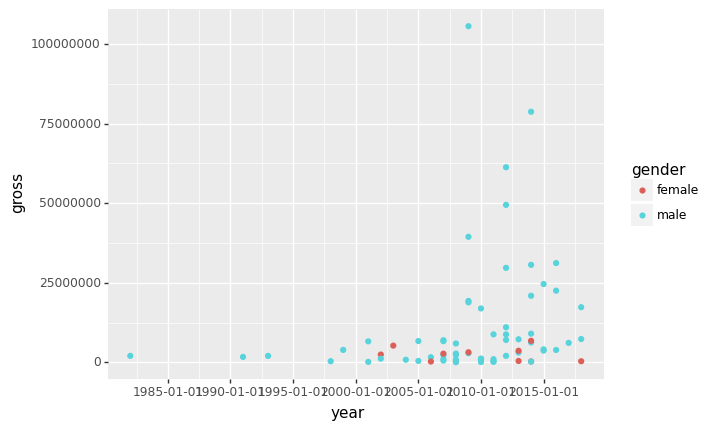

<ggplot: (8772441135297)>

In [497]:
# Movie grossing with year and gender:
ggplot(df_movies_with_gross, aes(x = 'year', y = 'gross',color='gender'))+geom_point()

# Conclusions

This it it! I managed to visualize relationships and answer all the data questions I set out to find answers to.

Some interesting data findings include:

1. Nowadays, movies that fail the Bechdel test tend to have higher IMDB ratings.
2. Over the years, there has been an increasing number of movies that pass the Bechdel test.
3. Movies with female directors have higher Bechdel scores.
4. There is no clear correlation between the budget or revenue of a movie and its Bechdel score, although it is possible to observe that films that pass the Bechdel test have a lower budget.

Of course, this analysis was only done with the data I gathered from two places, and might not represent the entire population of movies out there, because, out of 3 000 Spanish films that can be found on Wikipedia, only 123 have been subjected to the Bechdel test, which is too few data for a complete analysis.

Furthermore, there may have been other variables present that affected the outcome of this analysis, and it might be a good idea to experiment with data from a couple of other places before coming to a conclusion.

Finally, I would like to mention that the Bechdel test is not necessarily the best benchmark to measure female representation in movies. It does not take into consideration how well written a female character is, neither does it measure meaningful depth of character.

However, it is one of the most well-known metrics used to expose gender bias and is the only test we have this kind of data on.